<a href="https://colab.research.google.com/github/GianmarcoLattaruolo/Vision_Project/blob/main/MappaGeografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# with this line we can check if we are in colab or not
import os
import sys
from pathlib import Path
in_colab = 'google.colab' in sys.modules
print("are we in Colab?:",in_colab)

cwd = Path(os.getcwd())
if in_colab:
    from google.colab import drive
    drive.mount('/gdrive')
    !pip install -q condacolab
    import condacolab
    condacolab.install()
    os.chdir('/gdrive/MyDrive/GeoEstimation')
    
else:
    #our defult wd in local should be Vision_Project
    if str(cwd)[-14:] == 'Vision_Project':
        os.chdir(cwd / 'GeoEstimation')
    sys.path.append(cwd / 'GeoEstimation')

are we in Colab?: True
Mounted at /gdrive
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Installing the library geopandas may cause problems on windows. In case pip doesn't work, take a look here: https://geoffboeing.com/2014/09/using-geopandas-windows/

In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.0 MB/s eta 0:00:00


In [4]:
import geopandas as gpd

In [5]:
# easy example

latlon_df = pd.DataFrame()
latlon_df['LAT']=[45.2613]
latlon_df['LON']=[12.1957]
# col as float types
print(latlon_df.dtypes) #it should be float64

LAT    float64
LON    float64
dtype: object


In [6]:
latlon_df

,LAT,LON
0,45.2613,12.1957


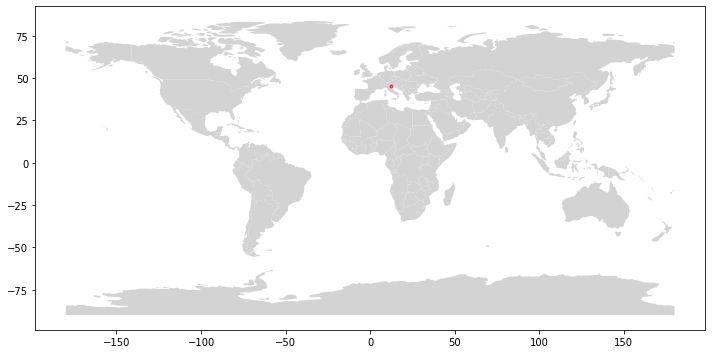

In [7]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

x = latlon_df['LON']
y = latlon_df['LAT']
plt.scatter(x, y, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Training set

In [18]:
training_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/data10k_places365.csv")

In [20]:
training_df.head()

,IMG_ID,owner,title,description,LAT,LON,u_city,u_country,taken,base_url,url,S3_label,Prob_indoor,Prob_natural,Prob_urban
0,17271526139.jpg,130418712@N05,Rio Trejo,Son numerosos los rios y arroyos que discurren...,36.861544,-5.177747,NaN,NaN,2015-04-26 17:11:11,https://www.flickr.com/photos/130418712@N05/17...,https://live.staticflickr.com/65535/1727152613...,1.0,-33.511620,53.368190,-19.810930
1,17776887679.jpg,55101137@N02,2015-05-13-022FD PH-XRD,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.463766,5.392935,Bodmin,United Kingdom,2015-05-13 00:00:22,https://www.flickr.com/photos/55101137@N02/177...,https://live.staticflickr.com/5335/17776887679...,2.0,-189.179653,-51.707682,240.922498
2,17898331633.jpg,55101137@N02,2015-05-17-022FD OO-GWA,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.190492,4.453765,Bodmin,United Kingdom,2015-05-17 00:00:22,https://www.flickr.com/photos/55101137@N02/178...,https://live.staticflickr.com/525/17898331633_...,0.0,74.219553,-55.220146,-18.960698
3,17940239919.jpg,55101137@N02,2015-05-14-020FD D-1553,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.326247,6.085953,Bodmin,United Kingdom,2015-05-14 00:00:20,https://www.flickr.com/photos/55101137@N02/179...,https://live.staticflickr.com/8860/17940239919...,0.0,65.803286,-48.901422,-16.865395
4,17963122505.jpg,55101137@N02,2015-05-13-025FD EI-DLI,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.463766,5.392935,Bodmin,United Kingdom,2015-05-13 00:00:25,https://www.flickr.com/photos/55101137@N02/179...,https://live.staticflickr.com/5457/17963122505...,2.0,-121.167288,-21.304930,142.514089


In [23]:
print(training_df.dtypes)

IMG_ID           object
owner            object
title            object
description      object
LAT             float64
LON             float64
u_city           object
u_country        object
taken            object
base_url         object
url              object
S3_label        float64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


In [22]:
training_lat = training_df['LAT']
training_lon = training_df['LON']

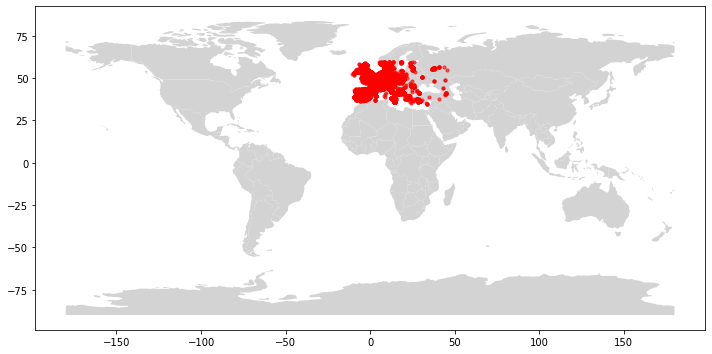

In [37]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(training_lon, training_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Test

In [27]:
test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps_places365.csv")

In [31]:
test_df.head()

,IMG_ID,AUTHOR,LAT,LON,S3_Label,S16_Label,S365_Label,Prob_indoor,Prob_natural,Prob_urban
0,104123223_7410c654ba_19_19355699@N00.jpg,19355699@N00,-16.663606,145.563537,1,8,150,0.002959,0.777815,0.219226
1,1095548455_f636d22cbb_1277_8576809@N08.jpg,8576809@N08,31.893581,-85.141124,2,15,231,0.003976,0.016128,0.979896
2,1185597181_0158ab4213_1311_43616936@N00.jpg,43616936@N00,42.346571,-71.097228,2,12,312,0.000005,0.000004,0.999991
3,1199004207_0ce4e7a456_1285_16418049@N00.jpg,16418049@N00,37.090924,25.370521,2,15,227,0.056002,0.007563,0.936435
4,1257001714_3453f5fc4b_1405_11490799@N08.jpg,11490799@N08,55.485759,28.791046,1,6,205,0.000083,0.991441,0.008475


In [28]:
print(test_df.dtypes)

IMG_ID           object
AUTHOR           object
LAT             float64
LON             float64
S3_Label          int64
S16_Label         int64
S365_Label        int64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


In [33]:
test_lat = test_df['LAT']
test_lon = test_df['LON']

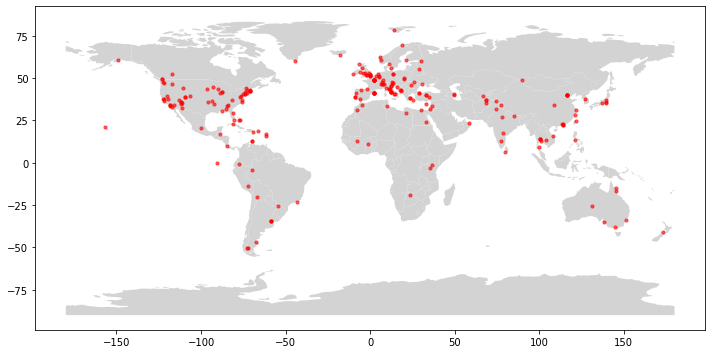

In [36]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(test_lon, test_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Test 3k

In [39]:
test3k_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps3k_places365.csv")
print(test3k_df.dtypes)

IMG_ID           object
AUTHOR           object
LAT             float64
LON             float64
S3_Label          int64
S16_Label         int64
S365_Label        int64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


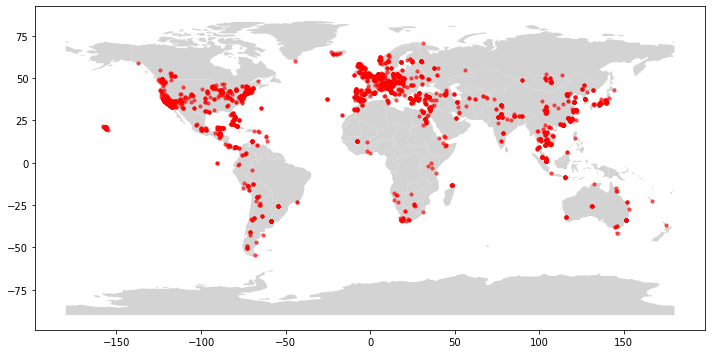

In [40]:
test3k_lat = test3k_df['LAT']
test3k_lon = test3k_df['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(test3k_lon, test3k_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()